# Stochastic Gradient Descent Regressor

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
class sgd_regressor:
    
    def __init__(self, n_iter=500, alpha=0.01, fit_intercept=True):
        self.coef_ = None
        self.n_iter = n_iter
        self.alpha_ = alpha
        self._fit_intercept = fit_intercept

    def shuffle_data(self, X, y):
        permute = np.random.permutation(len(y))
        return X[permute], y[permute]
    
    def init_coef(self, X):
        if self._fit_intercept:
            return np.random.rand(X.shape[1]+1)
        return np.random.rand(X.shape[1])
    
    def update(self, x, error):
        step = self.alpha_ * error * x
        if self._fit_intercept:
            self.coef_[1:] = self.coef_[1:] - step
            self.coef_[0] = self.coef_[0] - self.alpha_ * error
        else:
            self.coef_ = self.coef_ - step
    
    def fit(self, X, y):
        
        self.coef_ = self.init_coef(X)
        
        for epoch in range(self.n_iter):
            shuf_X, shuf_y = self.shuffle_data(X,y)
            
            for data, true in zip(shuf_X,shuf_y):
                pred = self.predict(data)
                error = pred - true
                self.update(data, error)

    def predict(self, X):
        if self._fit_intercept:
            return np.dot(X, self.coef_[1:]) + self.coef_[0]
        return np.dot(X, self.coef_)
    
    def mse(self, X, y):
        pred = self.predict(X)
        return np.mean((np.array(pred)-np.array(y))**2)

In [3]:
def gen_data(rows, gen_coefs, gen_inter = 0):
    X = np.random.rand(rows,len(gen_coefs))
    y = np.sum(np.tile(np.array(gen_coefs),(X.shape[0],1))*X,axis=1)
    y = y + np.random.normal(0,0.5, size=X.shape[0])
    y = y + gen_inter
    return X, y

In [4]:
X_train, y_train = gen_data(1000, [1.5], 3)
sgd = sgd_regressor(n_iter=500, alpha=0.01, fit_intercept=True)
sgd.fit(X_train, y_train)
sgd.mse(X_train, y_train)

0.23326598992758205

In [5]:
X_test, y_test = gen_data(1000, [1.5], 3)
preds = sgd.predict(X_test)
resid = preds - y_test
sgd.mse(X_test, y_test)

0.25527418925989465

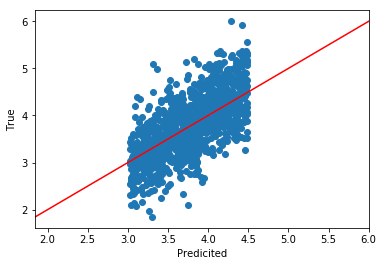

In [6]:
plt.scatter(preds, y_test)
scale = np.linspace(min(y_test), max(y_test), 100)
plt.xlim(min(y_test), max(y_test))
plt.plot(scale, scale, 'r')
plt.xlabel('Predicited')
plt.ylabel('True');

## To Do
* More learning rate functionality
* Add regularization
* More visualizations/metrics